### Load modules

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from scipy import stats
import pylab
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

### General description

The following dataset is the rain and temperature data from January to December for the period of 1961-2000, which is from four county meteorological stations representing Mengla, Menglun, Menghai, Jinghong:

#### Variable tag description:
- Mla=Mengla;  Mlun=Menglun;  Mhai=Menghai;  Jhong=Jinghong.
- R=monthly rainfall; AT=monthly temperature; 01,02,...,12 means 12 months from January to December.

In [18]:
# load the dataset
df=pd.read_csv('C:/Users/Administrator/Desktop/Python/exercise/WeatherData(1961-2000)/Rain and Temperature Data.csv',header=0)
df.head()

,MlaR01,MlaR02,MlaR03,MlaR04,MlaR05,MlaR06,MlaR07,MlaR08,MlaR09,MlaR10,...,JhongAT3,JhongAT4,JhongAT5,JhongAT6,JhongAT7,JhongAT8,JhongAT9,JhongAT10,JhongAT11,JhongAT12
0,4.8,46.8,41.4,97.7,262.8,205.4,215.5,415.2,245.1,21.5,...,21.3,24.2,25.8,26.0,25.6,24.8,24.1,22.9,19.0,16.7
1,12.9,45.0,16.8,105.3,166.0,258.6,91.0,330.9,93.0,115.8,...,19.4,24.4,26.1,25.1,25.6,24.5,23.9,22.1,18.8,15.4
2,3.3,5.2,42.0,114.7,90.0,314.1,363.8,350.6,72.9,228.1,...,20.4,24.0,26.3,25.9,25.3,24.6,25.0,22.0,19.4,15.4
3,6.1,9.7,46.5,88.7,125.4,335.7,448.6,241.5,104.6,155.6,...,20.5,23.7,24.8,25.1,24.2,24.9,24.7,23.3,18.8,15.1
4,19.2,28.3,19.8,44.1,176.2,228.2,340.3,235.8,194.2,128.6,...,20.2,24.3,25.9,25.3,25.4,24.3,24.1,22.2,18.5,17.4


### Example:  The Mla weather dataset

The following shows all the monthly rain and air temperature data for the period of 1961-2000 in Mla:

In [19]:
# rows and columns can be retrieved by location using .iloc[]
# get rows from 0 to 40, and columns from 0 to 24
Mla=df.iloc[:40,0:24]
Mla.head() # show the first 5 years' data

,MlaR01,MlaR02,MlaR03,MlaR04,MlaR05,MlaR06,MlaR07,MlaR08,MlaR09,MlaR10,...,MlaAT03,MlaAT04,MlaAT05,MlaAT06,MlaAT07,MlaAT08,MlaAT09,MlaAT10,MlaAT11,MlaAT12
0,4.8,46.8,41.4,97.7,262.8,205.4,215.5,415.2,245.1,21.5,...,20.5,22.9,24.5,24.4,24.8,24.2,23.6,22.2,18.7,16.2
1,12.9,45.0,16.8,105.3,166.0,258.6,91.0,330.9,93.0,115.8,...,18.0,22.5,24.4,24.5,25.1,24.4,23.4,21.4,18.6,14.7
2,3.3,5.2,42.0,114.7,90.0,314.1,363.8,350.6,72.9,228.1,...,18.8,21.9,24.3,24.6,24.7,24.0,24.4,21.4,19.2,15.3
3,6.1,9.7,46.5,88.7,125.4,335.7,448.6,241.5,104.6,155.6,...,19.7,22.4,24.0,24.4,23.8,24.2,23.6,22.7,17.8,14.7
4,19.2,28.3,19.8,44.1,176.2,228.2,340.3,235.8,194.2,128.6,...,18.8,22.6,24.3,24.3,24.4,23.6,23.2,21.6,18.1,16.9


In [20]:
# Mla Rainfall data:
MlaR=df.iloc[:40,0:12]
MlaR.head()

,MlaR01,MlaR02,MlaR03,MlaR04,MlaR05,MlaR06,MlaR07,MlaR08,MlaR09,MlaR10,MlaR11,MlaR12
0,4.8,46.8,41.4,97.7,262.8,205.4,215.5,415.2,245.1,21.5,47.9,53.6
1,12.9,45.0,16.8,105.3,166.0,258.6,91.0,330.9,93.0,115.8,12.3,5.4
2,3.3,5.2,42.0,114.7,90.0,314.1,363.8,350.6,72.9,228.1,101.9,11.3
3,6.1,9.7,46.5,88.7,125.4,335.7,448.6,241.5,104.6,155.6,33.4,47.1
4,19.2,28.3,19.8,44.1,176.2,228.2,340.3,235.8,194.2,128.6,140.2,68.7


In [21]:
# Mla Temperature data:
MlaAT=df.iloc[:40,12:24]
MlaAT.head()

,MlaAT01,MlaAT02,MlaAT03,MlaAT04,MlaAT05,MlaAT06,MlaAT07,MlaAT08,MlaAT09,MlaAT10,MlaAT11,MlaAT12
0,15.8,18.7,20.5,22.9,24.5,24.4,24.8,24.2,23.6,22.2,18.7,16.2
1,14.8,16.4,18.0,22.5,24.4,24.5,25.1,24.4,23.4,21.4,18.6,14.7
2,13.2,16.0,18.8,21.9,24.3,24.6,24.7,24.0,24.4,21.4,19.2,15.3
3,15.7,16.7,19.7,22.4,24.0,24.4,23.8,24.2,23.6,22.7,17.8,14.7
4,14.3,16.7,18.8,22.6,24.3,24.3,24.4,23.6,23.2,21.6,18.1,16.9


In [55]:
X=df['MlaAT01']

In [56]:
Y=df['MlaR01']

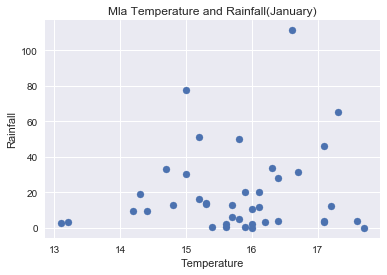

In [57]:
plt.scatter(X,Y)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Mla Temperature and Rainfall(January)')
plt.show()

In [81]:
model= smf.ols('Y~X',data=Mla).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.4916
Date:                Wed, 18 Oct 2017   Prob (F-statistic):              0.487
Time:                        16:20:35   Log-Likelihood:                -183.16
No. Observations:                  40   AIC:                             370.3
Df Residuals:                      38   BIC:                             373.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.4015     57.126     -0.357      0.723    -136.047      95.244
X              2.5334      3.613      0.701      0.487      -4.781       9.848
==============================================================================
Omnibus:                       27.486   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.760
Skew:                           1.911   Prob(JB):                     1.57e-11
Kurtosis:                       6.904   Cond. No.                         237.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scatter plot about the weather data of four places:

The scatter plot shows that there is a correlation between the rainfall and temperature. 

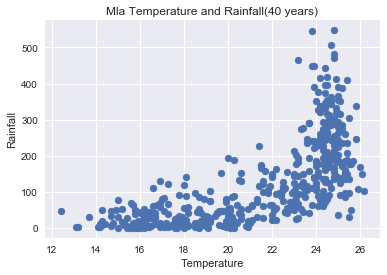

In [58]:
plt.scatter(MlaAT, MlaR)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Mla Temperature and Rainfall(40 years)')
plt.show()

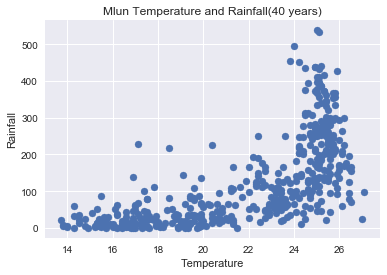

In [60]:
MlunR=df.iloc[:,24:36]
MlunAT=df.iloc[:,36:48]
plt.scatter(MlunAT, MlunR)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Mlun Temperature and Rainfall(40 years)')
plt.show()

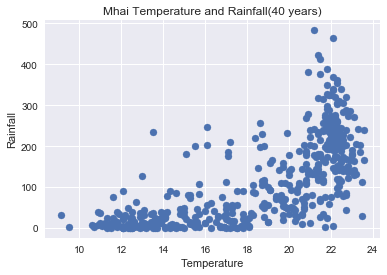

In [61]:
MhaiR=df.iloc[:,48:60]
MhaiAT=df.iloc[:,60:72]
plt.scatter(MhaiAT, MhaiR)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Mhai Temperature and Rainfall(40 years)')
plt.show()

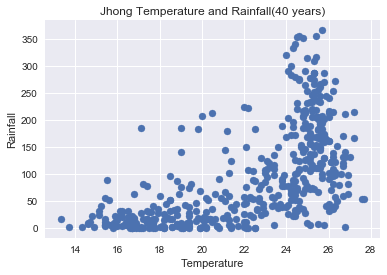

In [62]:
JhongR=df.iloc[:,72:84]
JhongAT=df.iloc[:,84:96]
plt.scatter(JhongAT, JhongR)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Jhong Temperature and Rainfall(40 years)')
plt.show()

In [63]:
X1=MlaAT.mean()

In [64]:
Y1=MlaR.mean()

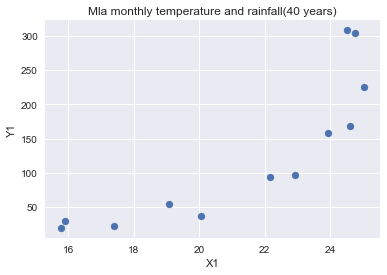

In [65]:
plt.scatter(X1, Y1)
plt.xlabel('X1')
plt.ylabel('Y1')
plt.title('Mla monthly temperature and rainfall(40 years)')
plt.show()

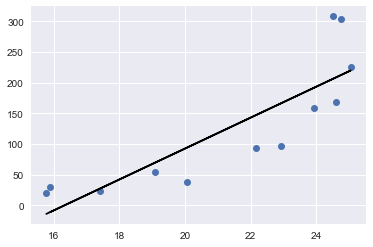

In [66]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X1, Y1)

predict_Y= intercept + slope * X1
pred_error = Y1 - predict_Y
degrees_of_freedom = len(X1) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

pylab.plot(X1, Y1, 'o')
pylab.plot(X1, predict_Y, 'k-')
pylab.show()

### OLS regression:

In [67]:
import random
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [68]:
df1= df[[0,24,48,72]]
df1.head()

,MlaR01,MlunR1,MhaiR1,JhongR1
0,4.8,4.2,4.2,5.6
1,12.9,11.9,8.0,6.0
2,3.3,4.1,2.3,2.0
3,6.1,4.3,3.7,5.0
4,19.2,31.8,10.9,9.6


In [69]:
df2= df[[12,36,60,84]]
df2.head()

,MlaAT01,MlunAT1,MhaiAT1,JhongAT1
0,15.8,16.4,12.8,16.3
1,14.8,15.3,12.4,15.7
2,13.2,14.0,11.3,14.3
3,15.7,15.7,11.8,15.4
4,14.3,14.3,11.5,14.6


#### Expanding the model

In [70]:
n = len(df)
df_train = np.random.rand(n) < 0.7
train = df[df_train].reset_index(drop=True)
test = df[df_train].reset_index(drop=True)

#### Modeling with the January rainfall data of four places:

In [72]:
model_1=smf.ols(formula='MlaR01~MlunR1+MhaiR1+JhongR1',data=train)
fitted=model_1.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MlaR01   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     26.99
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           4.63e-07
Time:                        16:19:02   Log-Likelihood:                -90.163
No. Observations:                  23   AIC:                             188.3
Df Residuals:                      19   BIC:                             192.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3148      3.922      0.335      0.741      -6.894       9.523
MlunR1         1.0535      0.304      3.466      0.003       0.417       1.690
MhaiR1         0.3423      0.362      0.944      0.357      -0.416       1.101
JhongR1       -0.0857      0.457     -0.187      0.853      -1.042       0.871
==============================================================================
Omnibus:                        4.613   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                2.952
Skew:                          -0.416   Prob(JB):                        0.229
Kurtosis:                       4.546   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

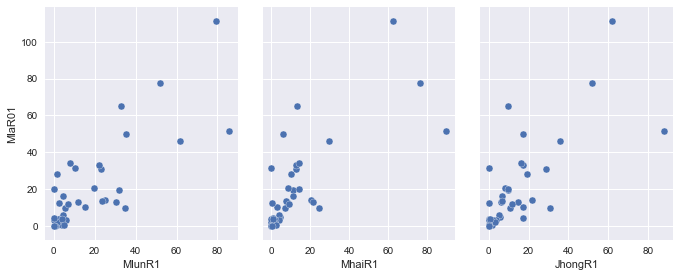

In [73]:
# visualize the relationship between the independent variable and the response variable
sns.pairplot(df, x_vars=['MlunR1','MhaiR1','JhongR1'], y_vars='MlaR01', size=4, aspect=0.8)  
plt.show()

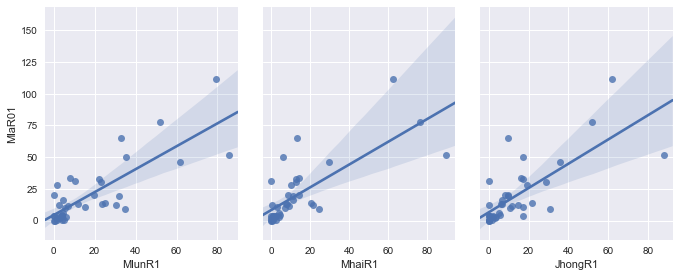

In [74]:
# seaborn通过kind='reg'添加一条最佳拟合直线和95%的置信带
sns.pairplot(df, x_vars=['MlunR1','MhaiR1','JhongR1'], y_vars='MlaR01', size=4, aspect=0.8,kind='reg')  
plt.show()

#### Modeling with the January temperature data of four places:

In [78]:
model_2= smf.ols('MlaAT01~MlunAT1+MhaiAT1+JhongAT1',data=train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MlaAT01   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     63.52
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           4.32e-10
Time:                        16:20:27   Log-Likelihood:                -6.1092
No. Observations:                  23   AIC:                             20.22
Df Residuals:                      19   BIC:                             24.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8238      1.268     -0.650      0.524      -3.477       1.829
MlunAT1        0.4209      0.168      2.507      0.021       0.069       0.772
MhaiAT1       -0.0204      0.157     -0.131      0.898      -0.348       0.307
JhongAT1       0.6198      0.194      3.191      0.005       0.213       1.026
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.582
Skew:                          -0.366   Prob(JB):                        0.748
Kurtosis:                       2.735   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

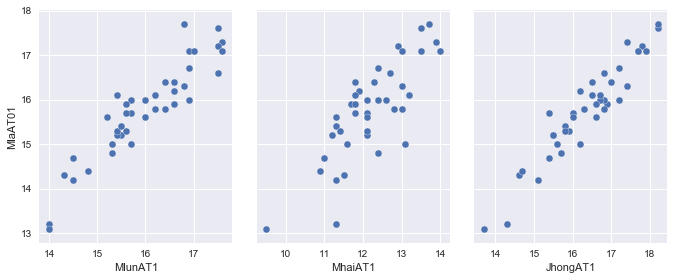

In [79]:
# visualize the relationship between the independent variable and the response variable
sns.pairplot(df, x_vars=['MlunAT1','MhaiAT1','JhongAT1'], y_vars='MlaAT01', size=4, aspect=0.8)  
plt.show()

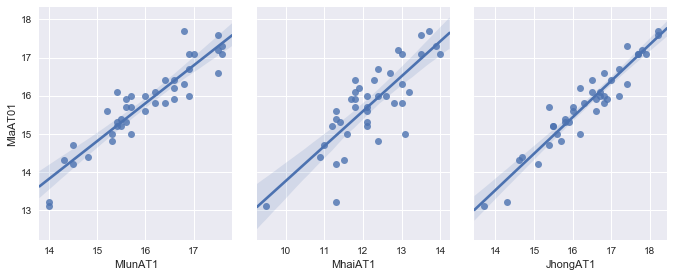

In [80]:
sns.pairplot(df, x_vars=['MlunAT1','MhaiAT1','JhongAT1'], y_vars='MlaAT01', size=4, aspect=0.8,kind='reg')  
plt.show()